## 1. DATAPREPROCESSING STEPS:


### 1.1 Importing the libraries & Loading the dataset:
- Importing essential libraries for data manipulation and text processing
- Load the dataset from the specified file path

In [3]:
import pandas as pd
import re
df = pd.read_csv('C:\\Users\\ADMIN\\FakeNewsNet.csv')
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


 ## 1.2 Converting text to lowercase:
 - Convert the text in the 'title' column to lowercase for uniformity

In [4]:
df['title'] = df['title'].str.lower()
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes over rape accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people's choice awards 2018: the best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to 'o...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl 10 years later: how upper east sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


## 1.3 Removing links and newline characters:
- Define a function to remove links and newline characters from text

In [5]:
def remove_links(text):
    if not isinstance(text, str):
        return text
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove newline characters
    text = text.replace('\n', ' ')
    return text

In [6]:
# Apply function to relevant columns
df['title'] = df['title'].apply(remove_links)
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes over rape accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people's choice awards 2018: the best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to 'o...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl 10 years later: how upper east sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


## 1.4 Removing words containing numbers and extra spaces:
- Define a function to remove words containing numbers and extra spaces from text

In [7]:
def remove_extraSpace(text):
    if not isinstance(text, str):
        return text
    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip() 

df['title'] = df['title'].apply(remove_extraSpace)
#df.head()
df.sample(frac=1).head(5)

,title,news_url,source_domain,tweet_num,real
17348,diplo responds to katy perry's sex ranking,https://www.refinery29.com/en-us/2017/06/15889...,www.refinery29.com,1,1
17571,selena gomez is making more than $ million for...,https://www.wearelatinlive.com/article/7176/se...,www.wearelatinlive.com,65,1
1233,'roseanne' canceled at abc following racist tweet,https://www.hollywoodreporter.com/live-feed/ro...,www.hollywoodreporter.com,41,1
22271,‘once upon a time’ to end with season on abc,https://deadline.com/2018/02/once-upon-a-time-...,deadline.com,1,1
11771,wags atlanta's kaylin jurrjens breaks down at ...,https://www.storiesflow.com/article/6907901712...,www.storiesflow.com,37,1


## 1.5 Removal of special characters:
- Define a function to remove special characters from text

In [8]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]',' ', text)
    return text
df['title'] = df['title'].apply(remove_spl_chars)
df.sample(frac=1).head(5)

,title,news_url,source_domain,tweet_num,real
10145,jenna dewan tatum opens up to hollywood mediu...,https://www.today.com/popculture/jenna-dewan-t...,www.today.com,4,1
21258,a ranking of the richest real housewives from ...,http://time.com/money/5117815/richest-real-hou...,time.com,24,1
13968,expressions to sum up kanye s claims that beyo...,www.dailyedge.ie/reaction-to-kanye-kim-beyonce...,www.dailyedge.ie,13,0
1971,justin theroux was with girlfriend heidi bive...,https://www.dailymail.co.uk/tvshowbiz/article-...,www.dailymail.co.uk,40,1
8955,bachelorette rachel lindsay shows off her n...,https://www.etonline.com/fashion/218739_bachel...,www.etonline.com,92,1


## 1.6 Removal of stopwords:
- Import NLTK stopwords and define a set of stopwords

In [9]:
from nltk.corpus import stopwords
#", ".join(stopwords.words('english'))

In [10]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['title'] = df['title'].apply(remove_stopwords)
df.sample(frac=1).head(5)
#df.head()

,title,news_url,source_domain,tweet_num,real
15717,law order special victims unit,https://en.wikipedia.org/wiki/911_(Law_%26_Ord...,en.wikipedia.org,1,1
14978,brad pitt neri oxman designing love nest toget...,latestgossipsite.125sites.com/brad-pitt-neri-o...,latestgossipsite.125sites.com,17,0
17871,jennifer lawrence margot robbie teach drinking...,video.vanityfair.com/watch/jennifer-lawrence-m...,video.vanityfair.com,29,0
4210,wells adams goes sarah hyland high school reunion,https://www.usmagazine.com/celebrity-news/news...,www.usmagazine.com,1,1
19351,lana tries convince rusev buy less traditional...,https://www.zerchoo.com/entertainment/lana-tri...,www.zerchoo.com,57,1



## 1.7 Stemming:
- Import NLTK PorterStemmer for stemming words

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_word(text):
    return " ".join([ps.stem(word) for word in text.split()])
df['text'] = df['title'].apply(stem_word)
#df.head()
df.sample(frac=1).head(5)


,title,news_url,source_domain,tweet_num,real,text
11319,things know mulan,https://ohmy.disney.com/movies/2015/03/21/13-t...,ohmy.disney.com,122,1,thing know mulan
3808,house gop introduces keep terrorists america act,https://web.archive.org/web/20090514023215/htt...,web.archive.org,7,1,hous gop introduc keep terrorist america act
18498,victoria david beckham celebrate year wedding ...,https://liveindex.co.uk/celebrities/victoria-a...,liveindex.co.uk,46,1,victoria david beckham celebr year wed anniver...
1311,jennifer lawrence talked luann de lesseps real...,http://www.bravotv.com/the-daily-dish/jennifer...,www.bravotv.com,55,1,jennif lawrenc talk luann de lessep real house...
8911,timeline complicated relationship taylor swift...,people.com/celebrity/a-timeline-of-the-complic...,people.com,59,0,timelin complic relationship taylor swift kim ...


## 1.8 Lemmatization:
- Import NLTK libraries for POS tagging and lemmatization

In [15]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
     

def lemm_word(text):
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [16]:
df['text'] = df['text'].apply(lambda x: lemm_word(x))
df.head()

,title,news_url,source_domain,tweet_num,real,text
0,kandi burruss explodes rape accusation real ho...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,kandi burruss explod rape accus real housew at...
1,people choice awards best red carpet looks,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,peopl choic award best red carpet look
2,sophia bush sends sweet birthday message one t...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,sophia bush send sweet birthday messag one tre...
3,colombian singer maluma sparks rumours inappro...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,colombian singer maluma spark rumour inappropr...
4,gossip girl years later upper east siders shoc...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,gossip girl year later upper east sider shock ...


In [17]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 2. Featuring Engineering
- Convert text data to TF-IDF features

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['real']

In [19]:
# Print X and y shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Print X (first 5 rows) and y (first 5 values) to understand what they contain
print("First 5 rows of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

Shape of X: (23196, 5000)
Shape of y: (23196,)
First 5 rows of X:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5 values of y:
 0    1
1    1
2    1
3    1
4    1
Name: real, dtype: int64


## 3. Model Building
- Split the dataset into Train, Test, and Validation sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [21]:
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

print(y_train)

Train set size: 10878
Validation set size: 5359
Test set size: 6959
7357     1
8401     1
13564    1
2552     0
2882     0
        ..
11439    1
7607     1
150      1
5949     1
6745     0
Name: real, Length: 10878, dtype: int64


In [22]:
print(f'Train data size: {X_train.shape}')

Train data size: (10878, 5000)


## 3.1: SVM Model Building
- SVM is a powerful classification model that aims to find the optimal hyperplane that best separates the classes.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Initialize SVM classifier

In [24]:
svm_clf = SVC(kernel='linear', random_state=42)

### Train the classifier

In [25]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Predict on the test set

In [26]:
y_pred = svm_clf.predict(X_test)

### accuracy score and confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8274177324328208
Confusion Matrix:
[[ 819  871]
 [ 330 4939]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.48      0.58      1690
           1       0.85      0.94      0.89      5269

    accuracy                           0.83      6959
   macro avg       0.78      0.71      0.73      6959
weighted avg       0.82      0.83      0.82      6959



## 3.2: Random Forest Model Building
- Random Forest is an ensemble learning model that builds multiple decision trees and merges them to get a more accurate and stable prediction.

In [28]:
from sklearn.ensemble import RandomForestClassifier

### Initialize Random Forest classifier

In [29]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

### Train the classifier

In [30]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict on the test set

In [31]:
y_pred_rf = rf_clf.predict(X_test)

### accuracy score and confusion matrix

In [32]:
### Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8166403218853283
Random Forest Confusion Matrix:
[[ 820  870]
 [ 406 4863]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.56      1690
           1       0.85      0.92      0.88      5269

    accuracy                           0.82      6959
   macro avg       0.76      0.70      0.72      6959
weighted avg       0.80      0.82      0.81      6959



## 3.3 Gradient Boosting Model Building
- Gradient Boosting is an ensemble technique that builds models sequentially, each trying to correct the errors of the previous one.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

### Initialize Gradient Boosting classifier

In [34]:
gb_clf = GradientBoostingClassifier(random_state=42)

### Train the classifier

In [35]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Predict on the test set

In [36]:
y_pred_gb = gb_clf.predict(X_test)

### accuracy score and confusion matrix

In [37]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)

cr_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(cr_gb)

Gradient Boosting Accuracy: 0.8054318149159362
Gradient Boosting Confusion Matrix:
[[ 466 1224]
 [ 130 5139]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.28      0.41      1690
           1       0.81      0.98      0.88      5269

    accuracy                           0.81      6959
   macro avg       0.79      0.63      0.65      6959
weighted avg       0.80      0.81      0.77      6959



# Visualization of Confusion Matrices

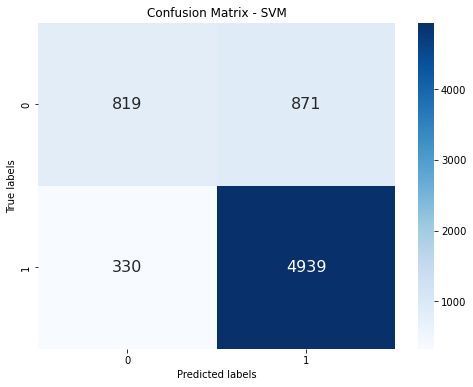

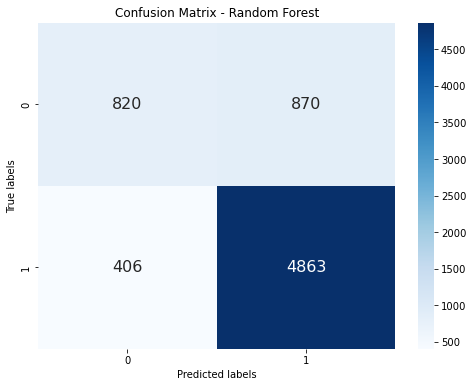

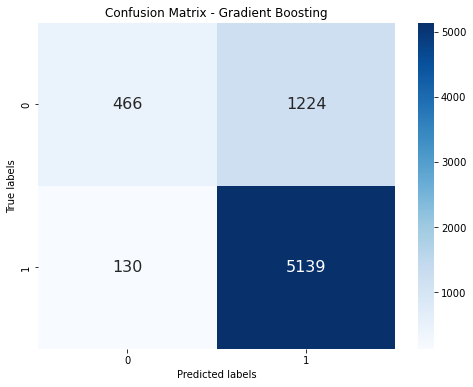

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# SVM Confusion Matrix
plot_confusion_matrix(cm, 'SVM')

# Random Forest Confusion Matrix
plot_confusion_matrix(cm_rf, 'Random Forest')

# Gradient Boosting Confusion Matrix
plot_confusion_matrix(cm_gb, 'Gradient Boosting')


# Conclusion:
- The Support Vector Machine (SVM) model performs best for fake news detection with an accuracy of 0.83 and strong precision, recall, and F1-scores.
- The Random Forest model also shows competitive performance with an accuracy of 0.82 but slightly lower recall for class 0 (fake news).
- The Gradient Boosting model, while still effective, has the lowest accuracy at 0.80 and a significant drop in recall for class 0.
- Overall, SVM is the most balanced and accurate model for this task.